In [1]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage.io as sio

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

In [6]:
# try:
#     from scipy.misc import face
#     face = face(gray=True)
# except ImportError:
#     face = sp.face(gray=True)

#face = sp.misc.imresize(face, 0.1) / 255.

face = sio.imread('/home/ubuntu/source/diff_register/notebooks/CC9_S4_s.tif')
face = face[0, :, :]
face = sp.misc.imresize(face, 0.05) / 255.
graph = image.img_to_graph(face)

In [7]:
face.shape

(96, 63)

In [8]:
beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

N_REGIONS = 10

/home/ubuntu/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


Spectral clustering: kmeans, 3.07s
Spectral clustering: discretize, 2.86s


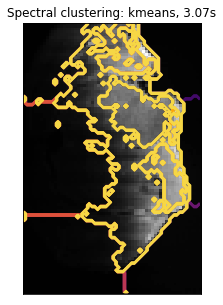

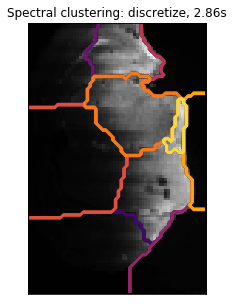

In [9]:
for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=1)
    t1 = time.time()
    labels = labels.reshape(face.shape)
    
    plt.figure(figsize=(5, 5))
    plt.imshow(face, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.inferno(l / float(N_REGIONS))])
    
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' %(assign_labels, (t1-t0))
    print(title)
    plt.title(title)

plt.show()